Provide a series of articles on boosting.

- Adaboost
- Gradient boosting
- XGBoost
- LightBoost
- CatBoost

Will provide derivations and code. In the form of video and article.  

# Boosting

Boosting is a machine learning technique that strings together many models in a sequence where each model corrects mistakes by the previous model.

Suppose you are a generalist. You take an exam that covers many topics: history, mathematics, sociology, etc. but you don't get all questions correct. For the questions you got wrong, you enlist the help of another person. They also will not be able to correct all your mistakes. So we repeat.

This is the core idea of boosting. Each model is a function of all the previous models. Each model focuses on the mistakes of the previous model.

Boosting is doing something quite different than you are probably used to in machine learning. A common paradigm is that we are trying to estimate parameters given a model type, data, and a loss function. But boosting is doing something a bit different.

Instead of optimizing in parameter space, it's optimizing in functional space! If this sounds strange, the idea will cement as we proceed.

Let's start with the first (unless there are ones before this I am not aware of; if you know of such, please leave a comment) boosting algorithm: Adaboost.

# Adaboost

The invention of Adaboost did not develop the way it's presented here. I found this approach via EOS book. The benefit of this approach, is that it allows us to view it as a special case of other techniques we know.

We desire two constraints:

1. Model the true (unknown) function as an additive model:

    $f(y|x) \approx \sum_i \beta_i h(x|\theta_i)$
    
    Here $h(x|\theta_i)$ is some model type (any ML model you like: decision tree, naive bayes, etc.)

2. Optimize using this loss function:

    $l(y, \hat{y}) = e^{-y\hat{y}}$
    

This loss function may seem weird. Why this one? Well, Adaboost was not orginially derived this way. But after the fact, it turned out the algorithm is minimizing using the exponential loss function (even if the original authors were not aware of that at the time).

Directly figuring out (1) is hard. Instead a _suboptimial_ solution is taken known as stagewise modeling. We greedily take the optimal approach one term at a time. That is, for each stage, we approximate our prediction function as:

$\hat{y} \approx \hat{y}_{m - 1} + \beta_m h(x| \theta_m)$

The cost function over the dataset is:
    
$J = \sum_i^N l(y_i, \hat{y}_i)$ 

$ = \sum_i^N e^{-y_i \hat{y}_i}$

$ = \sum_i^N e^{-y_i (\hat{y}_{m - 1} + \beta_m h(x_i | \theta_m))}$

$ = \sum_i^N e^{-y_i \hat{y}_{m - 1}} e^{-y_i \beta_m h(x_i | \theta_m)} $

Let's pause for a moment. What are we trying to do? We are trying to find the lowest value of $J$ possible. But what can we control? We can control:

- Model type [Do we use a decision tree or logistic regression for $\hat{y}$ ?]
- $\theta_m$ [The best set of model parameters that minimizes J]
- $\beta_m$ [The best beta that minimizes J]

First of all, we assume we use the same model structure (although in practice, no reason you couldn't search over model types). Let's fix $\beta_m$ for now and figure how we should pick $\theta_m$.


We can also clean up our notation a bit.

$ = \sum_i^N e^{-y_i \hat{y}_{m - 1}} e^{-y_i \beta_m h(x_i | \theta_m)} $

$ = \sum_i^N w_i e^{-y_i \beta_m h(x_i | \theta_m)} $

Where

$w_i = e^{-y_i \hat{y}_{m - 1}}$

We do this to avoid being overwhelmed with having to write a lot down. It also helps us focus on the things we actually have control over.

$ J = \sum_i^N w_i e^{-y_i \beta_m h(x_i | \theta_m)} $

If we assume our problem is a binary classfication problem (and that labels are -1 and +1). We get:

$ J = \sum_i^{N_{+}} w_i e^{-\beta_m h(x_i | \theta_m)} + \sum_j^{N_{-}} w_j e^{\beta_m h(x_j | \theta_m)}$

Note that $e^x > 0$ if we assume $\beta_m > 0$ then we just need to make both terms small as possible. The 2nd term of 

$\sum_j^{N_{-}} w_j e^{\beta_m h(x_j | \theta_m)}$

We just to push $h(x_j | \theta_m)$ as small as possible. That is, bring it all the way to -1.

However, our first term:

$\sum_i^{N_{+}} w_i e^{-\beta_m h(x_i | \theta_m)}$

If we actually want to make $h(x_i | \theta_m)$ as large as possible to minimize the overal term. This tells us that if $\beta_m > 0$, we should bring our prediction terms as close as possible to the true labels. A way to do this to minimize the error rate.

Now, what about $\beta_m$? Well:

$J = \sum_i w_i e^{-\beta_m y_i h(x_i | theta_m)}$

If our output is -1 or +1 from $h(x_i | theta_m)$ we can decompose our cost function into two parts: correct classifictions and misclassifictions. Let's use $\epsilon_i$ to be 0 or 1 depending on if we misclassify or not the ith example:

$J = \sum_i w_i ((1 - \epsilon_i) e^{-\beta_m} + \epsilon_i e^{\beta_m})$

We take the partial derivative and set to 0:

$\frac{\partial J}{\partial \beta_m} = \sum_i w_i (-(1 - \epsilon_i) e^{-\beta_m} + \epsilon_i e^{\beta_m}) = 0$

$\frac{\partial J}{\partial \beta_m} = \sum_i w_i (\epsilon_i e^{-\beta_m} - e^{-\beta_m} + \epsilon_i e^{\beta_m}) = 0$

$\frac{\partial J}{\partial \beta_m} = \sum_i w_i (\epsilon_i - 1 + \epsilon_i e^{2\beta_m}) = 0$

$e^{2\beta_m} \sum_i w_i \epsilon_i  = \sum_i w_i - \sum_i w_i \epsilon_i$

$e^{2\beta_m}  = \frac{\sum_i w_i - \sum_i w_i \epsilon_i} {\sum_i w_i \epsilon_i}$

$\beta_m  = \frac{1}{2} log (\frac{\sum_i w_i - \sum_i w_i \epsilon_i} {\sum_i w_i \epsilon_i})$

We can clean things up a bit. We can divide inside the log term the sum of weights, this yields:

$\beta_m  = \frac{1}{2} log (\frac{1 - \epsilon_m} {\epsilon_m})$

where 

$\epsilon_m = \frac{\sum_i w_i \epsilon_i}{\sum_i w_i}$

and of course:

$w_i = e^{-y_i \hat{y}_{m - 1}}$

and:

$\hat{y}_m = \hat{y}_{m - 1} + \beta_m h(x| \theta_m)$

Let's list out the algorithm now:

First, let's use our initial predictor as the prior.

$\hat{y}_1 = 0 + \beta_0 h(x| \theta_1)$

In [229]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [219]:
# The dataset we will practice on
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [217]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
class BinaryAdaboost:
    def __init__(self, n_rounds):
        self.n_rounds = n_rounds
        
    def predict(self, X):
        y_preds = np.array(list(zip(*[m.predict(X_test) for m in m.models])))
        y_preds = y_preds * self.model_weights
        y_preds = y_preds.sum(axis=1)
        y_preds = np.where(y_preds < 0, 0, 1)
        return y_preds
    
    def fit(self, X, y):
        """Assumes labels are provided in 0 and 1 format
        """
        # Convert to format our derivation
        # is based on
        y = np.where(y == 0, -1, 1)
        
        # Sample weight distribution
        m = X.shape[0]
        
        # Uniform distribution
        w = np.array([1. / m] * m)
        
        # Learned models
        self.models = []
        
        # Model weights
        self.model_weights = []
        
        # Record sample weights over time
        self.sample_weights = []
        
        for _ in range(self.n_rounds):
            
            # Fit a decision tree to residult
            model = DecisionTreeClassifier(max_depth=2)
            
            # Previous prediction 
            model.fit(X, y)
            y_hat = model.predict(X)
            self.models.append(model)
            
            e = (y != y_hat).astype(int)

            # Convert 0 to -1
            #y_hat = np.where(y_hat == 0, -1, 1)
            
            eps = w.dot(e)
            alpha = 0.5 * np.log((1 - eps) / eps)
            self.model_weights.append(alpha)
            
            # Update sample weight distribution
            w = (w * np.exp(-alpha * y * y_hat))
            
            # Normalize
            w = w / w.sum()
            
            self.sample_weights.append(w)

In [221]:
class BinaryAdaboost:
    def __init__(self, n_rounds):
        self.n_rounds = n_rounds
        
    def predict(self, X):
        y_preds = np.array(list(zip(*[m.predict(X_test) for m in m.models])))
        y_preds = y_preds * self.model_weights
        y_preds = y_preds.sum(axis=1)
        y_preds = np.where(y_preds < 0, 0, 1)
        return y_preds
    
    def fit(self, X, y):
        """Assumes labels are provided in 0 and 1 format
        """
        # Convert to format our derivation
        # is based on
        y = np.where(y == 0, -1, 1)
        
        # Sample weight distribution
        m = X.shape[0]
        
        # Uniform distribution
        w = np.array([1. / m] * m)
        
        # Learned models
        self.models = []
        
        # Model weights
        self.model_weights = []
        
        # Record sample weights over time
        self.sample_weights = []
        
        for _ in range(self.n_rounds):
            
            model = DecisionTreeClassifier(max_depth=2)
            model.fit(X, y, sample_weight=w)
            y_hat = model.predict(X)
            self.models.append(model)
            
            e = (y != y_hat).astype(int)

            # Convert 0 to -1
            #y_hat = np.where(y_hat == 0, -1, 1)
            
            eps = w.dot(e)
            alpha = 0.5 * np.log((1 - eps) / eps)
            self.model_weights.append(alpha)
            
            # Update sample weight distribution
            w = (w * np.exp(-alpha * y * y_hat))
            
            # Normalize
            w = w / w.sum()
            
            self.sample_weights.append(w)

In [222]:
n_rounds = list(range(1, 30))

In [223]:
custom_error_rates = []
for n in n_rounds:
    m = Adaboost(n_rounds=n)
    m.fit(X_train, y_train)
    error_rate = (m.predict(X_test) != y_test).mean()
    custom_error_rates.append(error_rate)

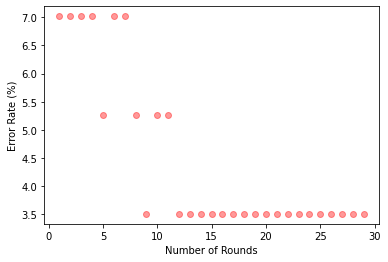

In [224]:
plt.scatter(n_rounds, np.array(custom_error_rates) * 100., color='red', alpha=.4)
plt.xlabel("Number of Rounds")
plt.ylabel("Error Rate (%)")
plt.show()

In [225]:
X = np.array(m.sample_weights)
X.shape

(29, 512)

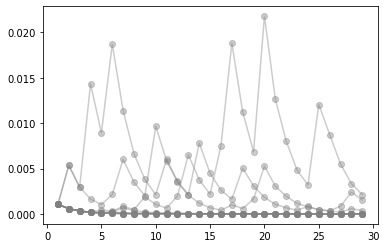

In [226]:
for i in range(10):
    plt.plot(n_rounds, X[:,i], color='gray', alpha=.4, marker='o')
plt.show()

In [227]:
error_rates = []
for n in n_rounds:
    m = AdaBoostClassifier(n_estimators=n, base_estimator=DecisionTreeClassifier(max_depth=2))
    m.fit(X_train, y_train)
    error_rate = (m.predict(X_test) != y_test).mean()
    error_rates.append(error_rate)

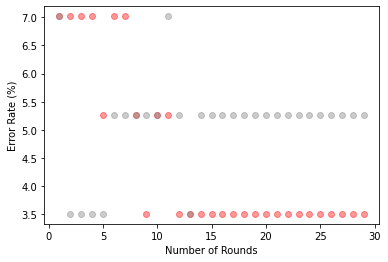

In [228]:
plt.scatter(n_rounds, np.array(custom_error_rates) * 100., color='red', alpha=.4)
plt.scatter(n_rounds, np.array(error_rates) * 100., color='gray', alpha=.4)
plt.xlabel("Number of Rounds")
plt.ylabel("Error Rate (%)")
plt.show()

Some links I found helpful

https://www.youtube.com/watch?v=2xudPOBz-vs&t=822s

https://mlcourse.ai/articles/topic10-boosting/